In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import DBSCAN

first_path ='d:\\python code\\--INTERN--/Dataset .csv'
data = pd.read_csv(first_path)
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [65]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Level 01 : Task 01: Top Cuisines 

1. Determine the top three most common cuisines in the dataset.

In [20]:
# Split the cuisines by comma, explode to separate each cuisine as a unique entry
cuisine_counts = data['Cuisines'].str.split(' ,').explode().value_counts()
top_cuisines = cuisine_counts.head(3)
top_cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

2. Calculate the percentage of restaurants serving each of the top cuisines

In [25]:
total_restaurants = data.shape[0]
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100
top_cuisines_percentage

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64

Task 2 : City Analysis


3. Identify the city with the highest number of restaurants in the dataset.

In [26]:
city_counts = data['City'].value_counts()

# Get the city with the highest number of restaurants
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

top_city, top_city_count

('New Delhi', 5473)

4. Calculate the average rating for restaurants in each city.

In [42]:
# Group by City and calculate the average rating
# Calculate the average rating by city
average_rating_by_city = data.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)

# Calculate the overall average rating
overall_average_rating = data["Aggregate rating"].mean()

average_rating_by_city, overall_average_rating


(City
 Inner City          4.900000
 Quezon City         4.800000
 Makati City         4.650000
 Pasig City          4.633333
 Mandaluyong City    4.625000
                       ...   
 New Delhi           2.438845
 Montville           2.400000
 Mc Millan           2.400000
 Noida               2.036204
 Faridabad           1.866932
 Name: Aggregate rating, Length: 141, dtype: float64,
 2.66637001361114)

5. Determine the city with the highest average rating.

In [43]:
# Determine the city with the highest average rating
city_highest_avg_rating = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()

city_highest_avg_rating, highest_avg_rating


('Inner City', 4.9)

Task 3 : Price Range Distribution


6. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

C:\Users\T470\AppData\Local\Temp\ipykernel_2208\851659535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=data, palette='magma')


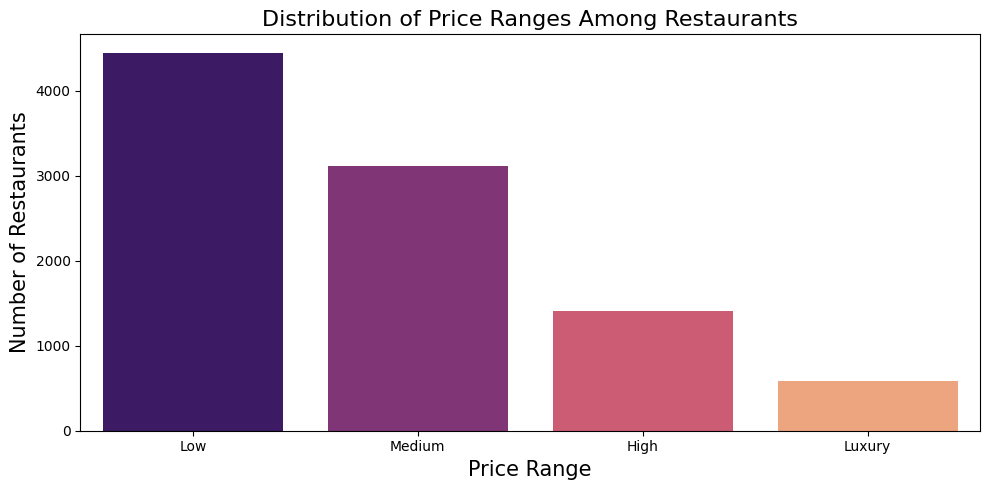

In [29]:

# Plot a bar chart for the distribution of price ranges
plt.figure(figsize=(10, 5))
sns.countplot(x='Price range', data=data, palette='magma')

# Add title and labels
plt.title('Distribution of Price Ranges Among Restaurants', fontsize=16)
plt.xlabel('Price Range', fontsize=15,)
plt.ylabel('Number of Restaurants', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Low', 'Medium', 'High', 'Luxury'], fontsize=10)  # Adjust labels if needed
plt.tight_layout()

# Show the plot
plt.show()


7. Calculate the percentage of restaurants in each price range category ?	

In [30]:
# Calculate the distribution of restaurants in each price range
price_range_counts = data['Price range'].value_counts(normalize=True) * 100  # Percentage distribution
price_range_counts = price_range_counts.sort_index()  # Sort by price range

price_range_counts


Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64

Task 4 : Online Delivery


8. Determine the percentage of restaurants that offer online delivery..?	

In [31]:
online_delivery_count =data[data["Has Online delivery"] == "Yes"].shape[0] # online delivery 
total_restaurants = data.shape[0]

on_delivery_percent = (online_delivery_count/total_restaurants) * 100 # online delivery percentage
on_delivery_percent

25.662234321013504

9. Compare the average ratings of restaurants with and without online delivery.?	

In [32]:
with_online_delivery = data[data["Has Online delivery"]== "Yes"]
without_online_delivery = data[data["Has Online delivery"]== "No"]

average_rating_with_delivery= with_online_delivery["Aggregate rating"].mean()
average_rating_without_delivery = without_online_delivery["Aggregate rating"].mean()

average_rating_with_delivery, average_rating_without_delivery

(3.2488372093023257, 2.465295774647887)

Level 02 : Task 01: Restaurant Ratings:


Analyze the distribution of aggregate ratings and determine the most common rating range?	

In [5]:
# Analyze the distribution of the 'Aggregate rating' column
rating_distribution = data['Aggregate rating'].value_counts().sort_index()

# Determine the most common rating range
most_common_rating = rating_distribution.idxmax()
most_common_count = rating_distribution.max()

rating_distribution, most_common_rating, most_common_count


(Aggregate rating
 0.0    2148
 1.8       1
 1.9       2
 2.0       7
 2.1      15
 2.2      27
 2.3      47
 2.4      87
 2.5     110
 2.6     191
 2.7     250
 2.8     315
 2.9     381
 3.0     468
 3.1     519
 3.2     522
 3.3     483
 3.4     498
 3.5     480
 3.6     458
 3.7     427
 3.8     400
 3.9     335
 4.0     266
 4.1     274
 4.2     221
 4.3     174
 4.4     144
 4.5      95
 4.6      78
 4.7      42
 4.8      25
 4.9      61
 Name: count, dtype: int64,
 0.0,
 2148)

Calculate the average number of votes received by  restaurants?	

In [6]:
average_votes = data['Votes'].mean()
average_votes

156.909747670401

Task 2 : Cuisine Combination


Identify the most common combinations of cuisines in the dataset ?	

In [35]:
common_combination_cuisines = data['Cuisines'].value_counts()

common_combination_cuisines.head()

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

Determine if certain cuisine combinations tend to have higher ratings.. ?

In [44]:
max_cuisines_ratings= data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

max_cuisines_ratings.head()

Cuisines
Italian, Deli              4.9
Hawaiian, Seafood          4.9
American, Sandwich, Tea    4.9
Continental, Indian        4.9
European, Asian, Indian    4.9
Name: Aggregate rating, dtype: float64

Task 3 : Geographic Analysis


Plot the locations of restaurants on a map using longitude and latitude coordinates. .?

In [48]:
# Drop rows with missing latitude or longitude values
locations = data[['Latitude', 'Longitude', 'Restaurant Name', 'Cuisines']].dropna()


mapbox_token = "your_mapbox_access_token"

# Set the access token for Plotly
px.set_mapbox_access_token(mapbox_token)

# Create a scatter plot on a map
restaurant_map = px.scatter_geo(
    locations,
    lat='Latitude',
    lon='Longitude',
    hover_name='Restaurant Name',
    hover_data={'Cuisines': True},
    title="Restaurant Locations",
    projection="robinson",
    width=1200,
    height=800 
)

# Save the map as an HTML file
restaurant_map.write_html("restaurant_locations_plotly.html")
restaurant_map.show()




Identify any patterns or clusters of restaurants in specific areas. ?	

In [32]:


# Step 2: Clean the data - Remove rows with missing Latitude/Longitude
locations = data[['Latitude', 'Longitude', 'Restaurant Name']].dropna()

# Step 3: Apply clustering using DBSCAN
# DBSCAN parameters
eps_distance = 0.01  # Approx. 1 km radius (tune based on your data)
min_samples = 5      # Minimum points to form a cluster

# DBSCAN clustering (without complex haversine conversion for simplicity)
dbscan = DBSCAN(eps=eps_distance, min_samples=min_samples)
locations['Cluster'] = dbscan.fit_predict(locations[['Latitude', 'Longitude']])

# Step 4: Visualize the clusters using Plotly
cluster_map = px.scatter_mapbox(
    locations,
    lat='Latitude',
    lon='Longitude',
    color='Cluster',  # Points colored by cluster ID
    hover_name='Restaurant Name',
    title="Restaurant Clusters",
    mapbox_style="open-street-map",
    zoom=5
)


# Optionally save the map to a file
cluster_map.write_html("restaurant_clusters_simple.html")
cluster_map

Task 4 : Restaurant Chains


Identify if there are any restaurant chains present in the dataset...?

In [7]:


# Step 1: Count the occurrences of each restaurant name
restaurant_counts = data['Restaurant Name'].value_counts()

# Step 2: Filter names that appear more than once to identify chains
restaurant_chains = restaurant_counts[restaurant_counts > 1]

# Step 3: Display the list of restaurant chains and their counts
restaurant_chains  # Inline display in Jupyter

# Step 4: Extract details of the restaurant chains
chain_details = data[data['Restaurant Name'].isin(restaurant_chains.index)]

# Step 5: Show the first few rows of the chain details
chain_details.head(5)  # Inline display of details


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.9,Dark Green,Excellent,1070
12,6318433,Silantro Fil-Mex,162,Quezon City,"Second Floor, UP Town Center, Katipunan Avenue...","UP Town Center, Diliman, Quezon City","UP Town Center, Diliman, Quezon City, Quezon City",121.075419,14.649503,"Filipino, Mexican",...,Botswana Pula(P),No,No,No,No,3,4.8,Dark Green,Excellent,294
35,6601589,Coco Bambu,30,Bras�_lia,"Bras�_lia Shopping - Piso 2, SCN 5, Bloco A, A...","Bras�_lia Shopping, Asa Norte","Bras�_lia Shopping, Asa Norte, Bras�_lia",-47.889000,-15.786500,International,...,Brazilian Real(R$),No,No,No,No,4,4.2,Green,Very Good,17
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,Brazilian Real(R$),No,No,No,No,4,4.9,Dark Green,Excellent,30


 Analyze the ratings and popularity of different restaurant chains..?	

In [18]:
# Step 1: Identify restaurant chains
restaurant_counts = data['Restaurant Name'].value_counts()
restaurant_chains = restaurant_counts[restaurant_counts > 1].index  # Chains

# Step 2: Filter data for restaurant chains
chain_data = data[data['Restaurant Name'].isin(restaurant_chains)]

# Step 3: Calculate popularity (total votes) and average rating for each chain
chain_summary = chain_data.groupby('Restaurant Name').agg(
    Total_Votes=('Votes', 'sum'),  # Total votes as a measure of popularity
    Average_Rating=('Aggregate rating', 'mean')  # Average rating
).reset_index()

# Step 4: Sort chains by popularity and ratings
chain_summary = chain_summary.sort_values(by=['Total_Votes', 'Average_Rating'], ascending=[False, False])

# Display the top chains
chain_summary.head()

,Restaurant Name,Total_Votes,Average_Rating
62,Barbeque Nation,28142,4.353846
7,AB's - Absolute Barbecues,13400,4.825000
79,Big Chill,10853,4.475000
239,Farzi Cafe,10098,4.366667
692,Truffles,9682,3.950000


Level 3 : Task 1 : Restaurant Reviews

Analyze the text reviews to identify the most common positive and negative keywords.

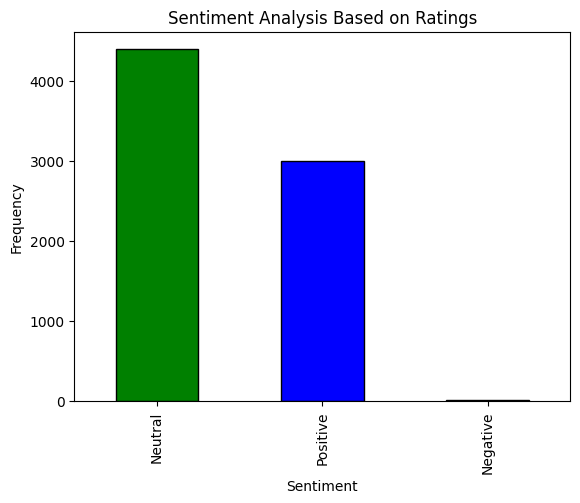

In [31]:
data['Sentiment'] = pd.cut(data['Aggregate rating'], bins=[0, 2, 3.5, 5], labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'yellow'], edgecolor='black')
plt.title('Sentiment Analysis Based on Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


Calculate the average length of reviews and explore if there is a relationship between review length and rating.

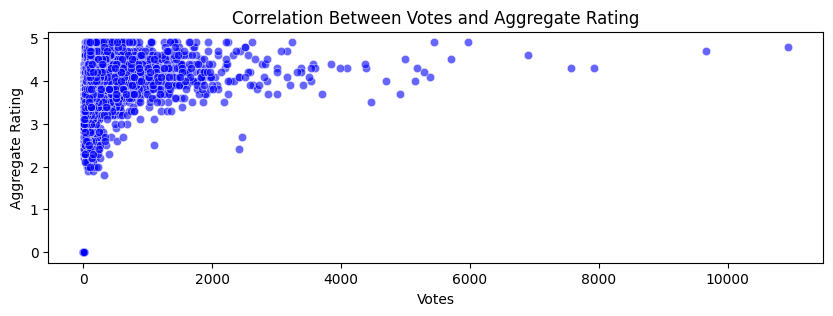

In [30]:
plt.figure(figsize=(10, 3))
sns.scatterplot(x=data['Votes'], y=data['Aggregate rating'], color='blue', alpha=0.6)
plt.title('Correlation Between Votes and Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()



Task 2 : Votes Analysis

Identify the restaurants with the highest and
lowest number of votes.

In [67]:
highest_votes = data[data['Votes'] == data['Votes'].max()]
print("Restaurants with the highest number of votes:")
print(highest_votes[['Restaurant Name', 'Votes']])


print("_________________________________________________")


lowest_votes = data[data['Votes'] == data['Votes'].min()]
print("\nRestaurants with the lowest number of votes:")
print(lowest_votes[['Restaurant Name', 'Votes']])

Restaurants with the highest number of votes:
    Restaurant Name  Votes
728            Toit  10934
_________________________________________________

Restaurants with the lowest number of votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [54]:

# Ensure the necessary columns are available
if 'Votes' in data.columns and 'Aggregate rating' in data.columns:


 # Calculate correlation between 'Votes' and 'Aggregate rating'
    correlation = data[['Votes', 'Aggregate rating']].corr()

    print("Correlation between Number of Votes and Rating:")
    print(correlation)
else:
    print("The necessary columns ('Votes' and 'Aggregate rating') are not found in the dataset.")


Correlation between Number of Votes and Rating:
                     Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


Task 3 : Price Range vs. Online Delivery and
Table Booking

Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking. Determine if higher-priced restaurants are
more likely to offer these services

In [56]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [57]:
data['Has Table booking'] = data['Has Table booking'].map({'Yes': True, 'No': False})
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': True, 'No': False})

Text(0.5, 1.0, 'Relationship between Price Range and Availability of Table Booking & Online Delivery')

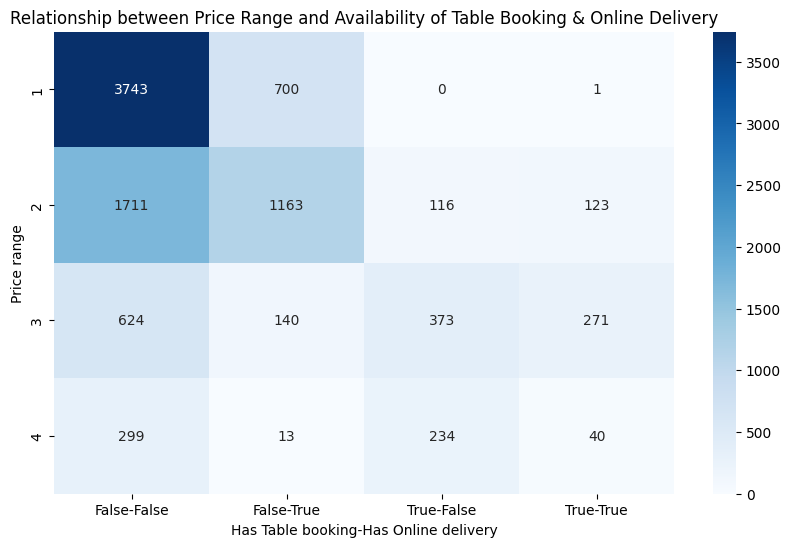

In [58]:
plt.figure(figsize=(10, 6))
heatmap = pd.crosstab(data['Price range'], [data['Has Table booking'], data['Has Online delivery']])
sns.heatmap(heatmap, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Relationship between Price Range and Availability of Table Booking & Online Delivery')

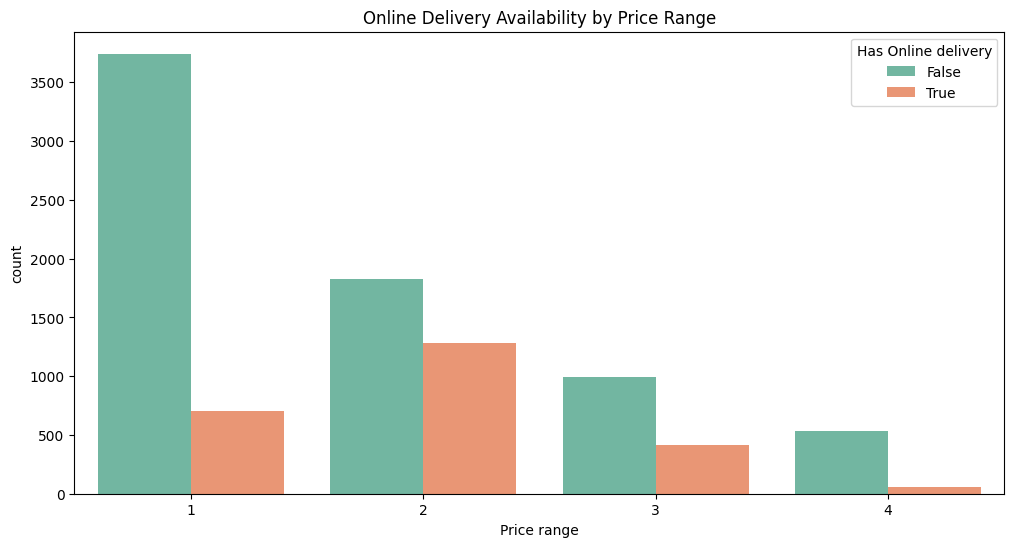

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=data, palette='Set2')
plt.title('Online Delivery Availability by Price Range')
plt.show()



Text(0.5, 1.0, 'Table Booking Availability by Price Range')

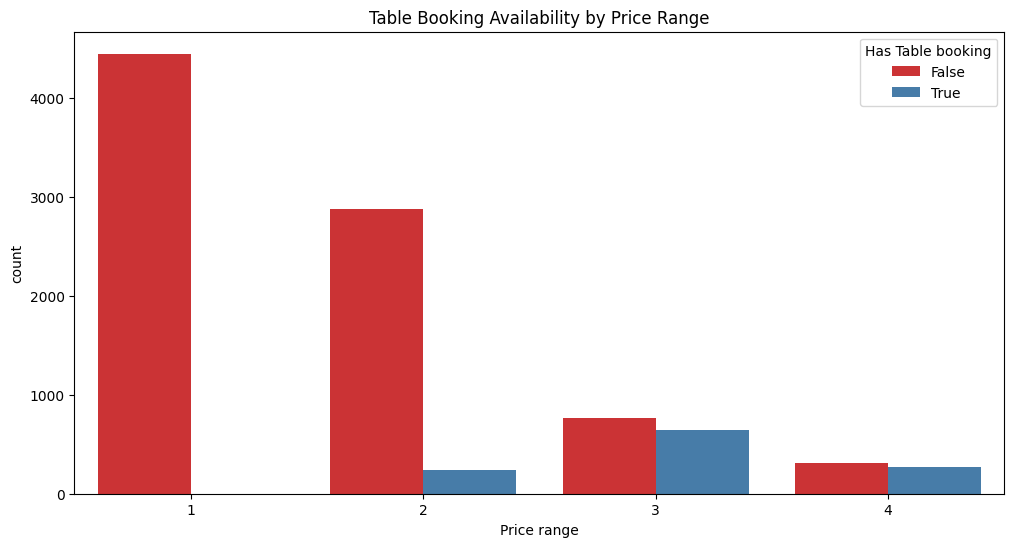

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Table booking', data=data, palette='Set1')
plt.title('Table Booking Availability by Price Range')